<a href="https://colab.research.google.com/github/liobaDB/DS/blob/main/btc1008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#import numpy as np  # useful for many scientific computing in Python
##import pandas as pd # primary data structure library
##from google.colab import files
#files.download('bitcoins.xlsx')

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BTCfrom2015.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
#path = "/content/drive/MyDrive/Colab Notebooks/BTCfrom2015.csv"
#df = pd.read_csv(path)

df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-07,246.169998,246.681000,242.585007,242.968994,242.968994,22999200
2015-10-08,243.074997,244.251007,242.179001,242.304001,242.304001,18515300
2015-10-09,242.498001,244.227997,242.121994,243.931000,243.931000,17353100
2015-10-10,243.740005,245.319000,243.074005,244.940994,244.940994,15912700
2015-10-11,244.742004,247.242996,244.151993,247.050003,247.050003,16827300


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2558 entries, 2015-10-07 to 2022-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2558 non-null   float64
 1   High       2558 non-null   float64
 2   Low        2558 non-null   float64
 3   Close      2558 non-null   float64
 4   Adj Close  2558 non-null   float64
 5   Volume     2558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.9 KB


In [20]:
len(df)

2558

In [34]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2015-10-07,242.968994
2015-10-08,242.304001
2015-10-09,243.931000
2015-10-10,244.940994
2015-10-11,247.050003


(array([16715, 16801, 17167, 17532, 17897, 18262, 18628, 18993, 19272]),
 <a list of 9 Text major ticklabel objects>)

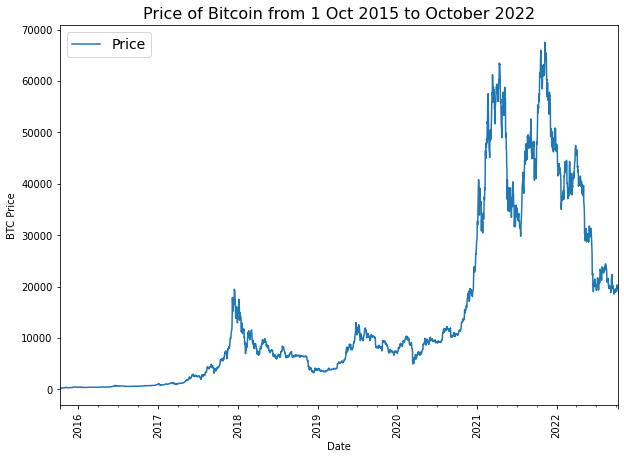

In [33]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2015 to October 2022", fontsize=16)
plt.legend(fontsize=14);
plt.xticks(rotation=90)


In [37]:
# Check for GPU
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [59]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime



timesteps = []
btc_price = []
with open("/content/drive/MyDrive/Colab Notebooks/BTCfrom2015.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2015, 10, 7, 0, 0),
  datetime.datetime(2015, 10, 8, 0, 0),
  datetime.datetime(2015, 10, 9, 0, 0),
  datetime.datetime(2015, 10, 10, 0, 0),
  datetime.datetime(2015, 10, 11, 0, 0),
  datetime.datetime(2015, 10, 12, 0, 0),
  datetime.datetime(2015, 10, 13, 0, 0),
  datetime.datetime(2015, 10, 14, 0, 0),
  datetime.datetime(2015, 10, 15, 0, 0),
  datetime.datetime(2015, 10, 16, 0, 0)],
 [246.681,
  244.251007,
  244.227997,
  245.319,
  247.242996,
  247.453995,
  250.235992,
  254.274994,
  255.962006,
  266.13501])

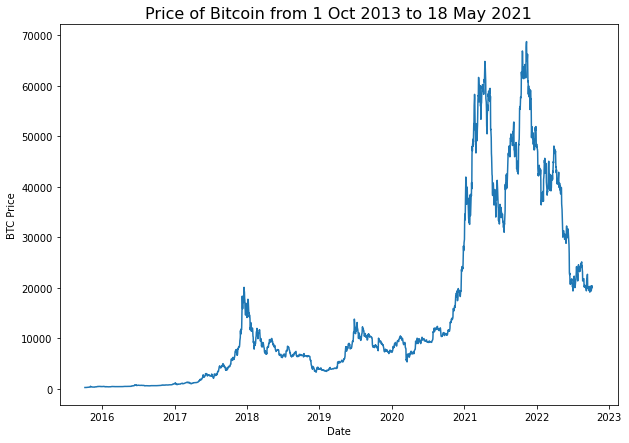

In [60]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [61]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2015-10-07T00:00:00.000000000', '2015-10-08T00:00:00.000000000',
        '2015-10-09T00:00:00.000000000', '2015-10-10T00:00:00.000000000',
        '2015-10-11T00:00:00.000000000', '2015-10-12T00:00:00.000000000',
        '2015-10-13T00:00:00.000000000', '2015-10-14T00:00:00.000000000',
        '2015-10-15T00:00:00.000000000', '2015-10-16T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([242.968994, 242.304001, 243.931   , 244.940994, 247.050003,
        245.307999, 249.507996, 251.988998, 254.320007, 262.868988]))

In [62]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2046,), (512,), (2046,), (512,))

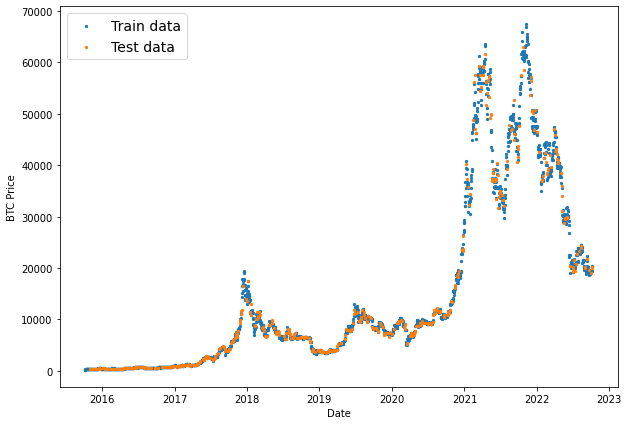

In [63]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [64]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2046, 512, 2046, 512)

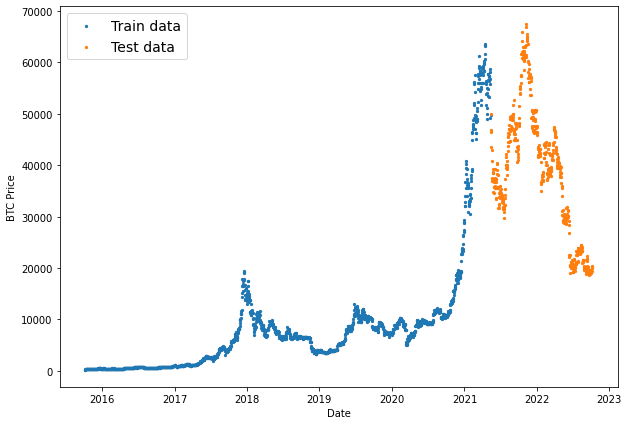

In [65]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [66]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

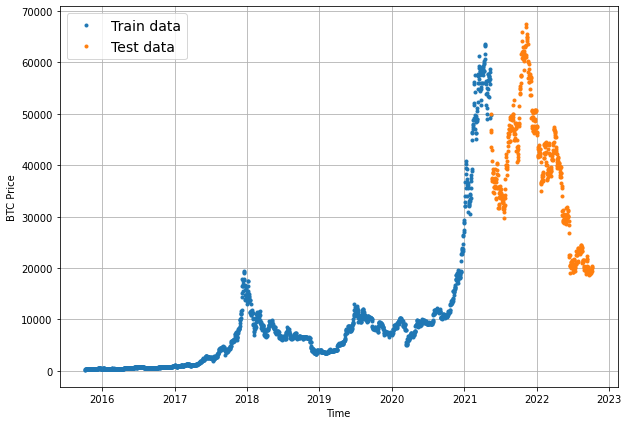

In [67]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [68]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([49880.535156, 46760.1875  , 46456.058594, 43537.511719,
        42909.402344, 37002.441406, 40782.738281, 37304.691406,
        37536.632813, 34770.582031]),
 array([19110.546875, 19426.720703, 19573.050781, 19431.789063,
        19312.095703, 19044.107422, 19623.580078, 20336.84375 ,
        20160.716797, 19955.443359]))

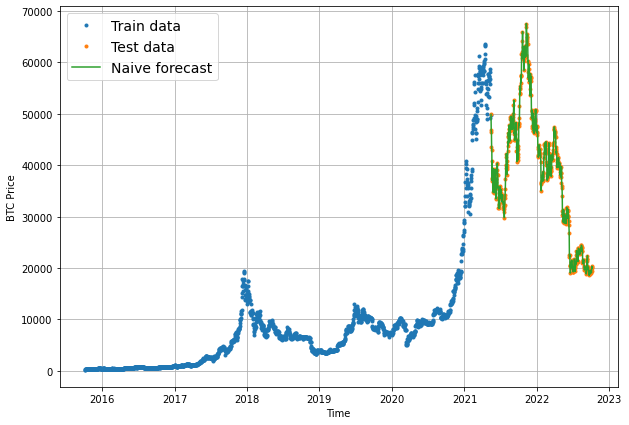

In [69]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

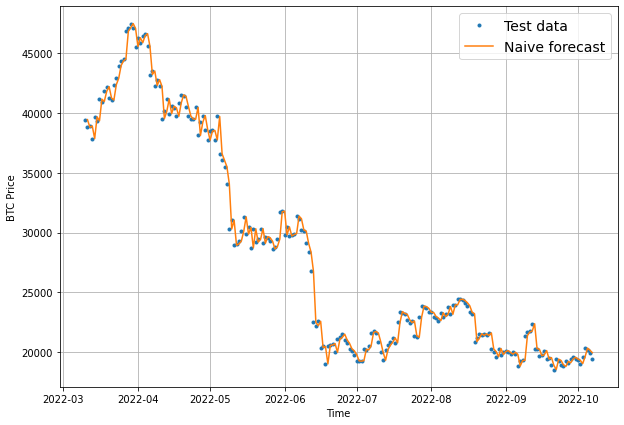

In [70]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [77]:
# Let's get TensorFlow! 
import tensorflow as tf

In [78]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [80]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [81]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 1026.0962,
 'mse': 2108155.5,
 'rmse': 1451.9489,
 'mape': 2.6996863,
 'mase': 1.0040182}

In [82]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

38206.92831048241

In [83]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [84]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [85]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [86]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [87]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2551, 2551)

In [88]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [242.968994 242.304001 243.931    244.940994 247.050003 245.307999
 249.507996] -> Label: [251.988998]
Window: [242.304001 243.931    244.940994 247.050003 245.307999 249.507996
 251.988998] -> Label: [254.320007]
Window: [243.931    244.940994 247.050003 245.307999 249.507996 251.988998
 254.320007] -> Label: [262.868988]


In [89]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [19426.720703 19573.050781 19431.789063 19312.095703 19044.107422
 19623.580078 20336.84375 ] -> Label: [20160.716797]
Window: [19573.050781 19431.789063 19312.095703 19044.107422 19623.580078
 20336.84375  20160.716797] -> Label: [19955.443359]
Window: [19431.789063 19312.095703 19044.107422 19623.580078 20336.84375
 20160.716797 19955.443359] -> Label: [19461.140625]


In [90]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [91]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2040, 511, 2040, 511)

In [92]:
train_windows[:5], train_labels[:5]

(array([[242.968994, 242.304001, 243.931   , 244.940994, 247.050003,
         245.307999, 249.507996],
        [242.304001, 243.931   , 244.940994, 247.050003, 245.307999,
         249.507996, 251.988998],
        [243.931   , 244.940994, 247.050003, 245.307999, 249.507996,
         251.988998, 254.320007],
        [244.940994, 247.050003, 245.307999, 249.507996, 251.988998,
         254.320007, 262.868988],
        [247.050003, 245.307999, 249.507996, 251.988998, 254.320007,
         262.868988, 270.640015]]), array([[251.988998],
        [254.320007],
        [262.868988],
        [270.640015],
        [261.643005]]))

In [94]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [95]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [96]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
16/16 [==============================] - 2s 58ms/step - loss: 2170.1230 - mae: 2170.1230 - val_loss: 5504.2266 - val_mae: 5504.2266
Epoch 2/100
16/16 [==============================] - 1s 36ms/step - loss: 709.7936 - mae: 709.7936 - val_loss: 1796.3177 - val_mae: 1796.3177
Epoch 3/100
16/16 [==============================] - 1s 34ms/step - loss: 489.8088 - mae: 489.8088 - val_loss: 1635.4863 - val_mae: 1635.4863
Epoch 4/100
16/16 [==============================] - 1s 35ms/step - loss: 450.2158 - mae: 450.2158 - val_loss: 1574.1533 - val_mae: 1574.1533
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 421.7211 - mae: 421.7211 - val_loss: 1608.0631 - val_mae: 1608.0631
Epoch 6/100
16/16 [==============================] - 1s 35ms/step - loss: 406.8178 - mae: 406.8178 - val_loss: 1500.0902 - val_mae: 1500.0902
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 400.7036 - mae: 400.7036 - val_loss: 1632.8978 - val_mae: 1632.8978
Epoch 

In [97]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1140.6567 - mae: 1140.6567


[1140.65673828125, 1140.65673828125]

In [98]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1050.2776 - mae: 1050.2776


[1050.277587890625, 1050.277587890625]

In [99]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [100]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(511, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([49138.707, 47176.977, 45973.29 , 43710.848, 42717.996, 37554.387,
        39597.86 , 37490.08 , 37392.895, 34772.355], dtype=float32)>)

In [101]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1050.2778,
 'mse': 2179035.8,
 'rmse': 1476.1558,
 'mape': 2.774667,
 'mase': 1.0276794}

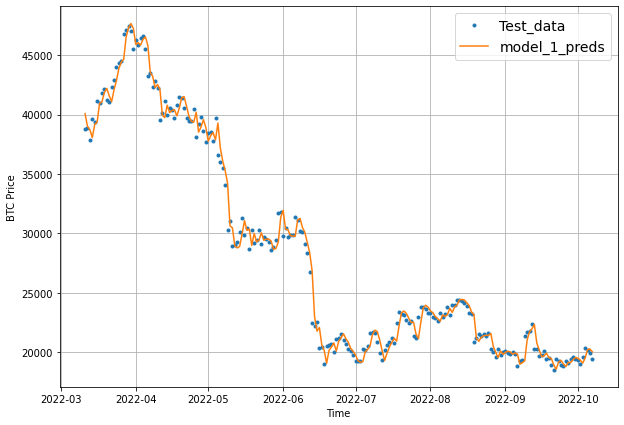

In [102]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [103]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [104]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2528, 2528)

In [105]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2022, 506, 2022, 506)

In [106]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [107]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1807.2286


1807.2286376953125

In [108]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1146.1403


1146.1402587890625

In [109]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [110]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1146.1404,
 'mse': 2438952.5,
 'rmse': 1561.7146,
 'mape': 3.0503345,
 'mase': 1.1400974}

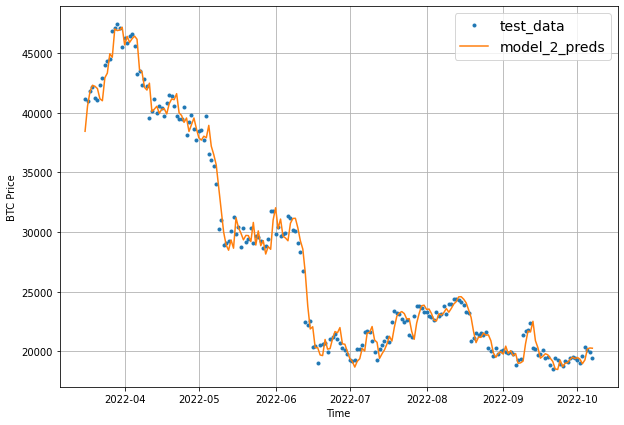

In [111]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [112]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2522, 2522)

In [113]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2017, 505, 2017, 505)

In [114]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [115]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 2115.9324


2115.932373046875

In [116]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[49032.77 , 47342.863, 50398.863, 48496.785, 48584.4  , 49396.42 ,
        48460.965],
       [46431.668, 44808.61 , 47778.047, 46399.316, 46778.15 , 46169.566,
        46343.832],
       [47600.496, 46159.82 , 47601.305, 45851.84 , 46335.727, 46346.6  ,
        46821.33 ],
       [43945.984, 42567.684, 43782.18 , 44252.8  , 43076.08 , 43791.848,
        43866.477],
       [43219.727, 42388.727, 43411.7  , 42843.676, 43987.656, 43058.004,
        44037.105]], dtype=float32)>

In [117]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([6708.5767 , 5604.0703 , 7553.3022 , 5181.5117 , 5491.6147 ,
        1133.673  , 1688.2517 ,  935.101  , 2354.7292 , 1958.0692 ,
        2084.9475 , 1703.2678 , 2230.9185 , 2230.4124 , 1465.8225 ,
        1854.6261 , 2988.504  , 1334.9247 , 1730.6858 , 1594.9012 ,
        1903.4514 , 1788.6686 , 1748.4102 , 3069.0786 , 3730.5073 ,
        6141.0195 , 3409.4927 , 3510.0854 , 2001.5614 , 4032.9626 ,
        1135.783  , 2025.3312 , 3662.4976 , 3952.1375 , 4548.9897 ,
        2557.5825 , 2265.3013 , 2174.2522 , 1305.6881 , 2228.0435 ,
        2340.3933 , 1658.7771 , 3000.0403 , 2777.7024 , 1244.6501 ,
         977.7294 , 1271.0625 , 1178.6986 ,  797.4827 ,  959.52454,
         806.851  ,  374.5491 ,  786.12946,  488.16824,  911.7129 ,
         989.1761 ,  737.8597 ,  859.2288 , 1449.4948 , 1546.5393 ,
         693.1618 , 1021.0485 ,  769.923  , 1265.5916 , 1677.3527 ,
        1827.885  , 3304.782  , 4573.146  , 5040.6743 , 6087.6025 ,
        6356.152  , 5296.2427 , 5237.7783

In [118]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [119]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 2115.9324,
 'mse': 8508954.0,
 'rmse': 2424.9053,
 'mape': 5.644074,
 'mase': 2.0779133}

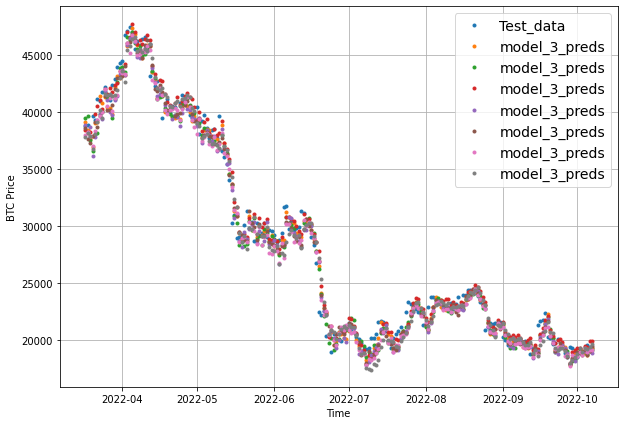

In [120]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

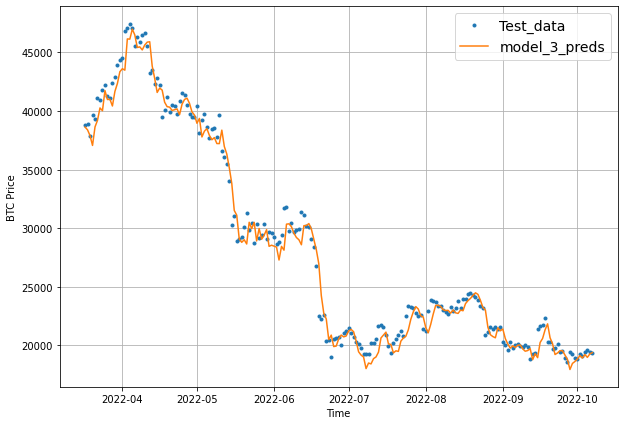

In [121]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

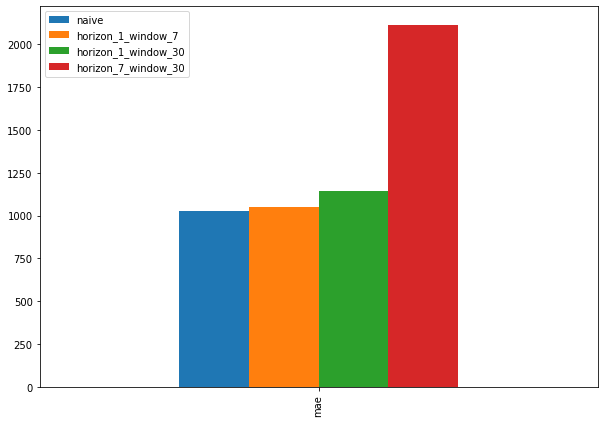

In [122]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [123]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [124]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2551, 2551)

In [125]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2040, 511, 2040, 511)

In [126]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [127]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[242.969]
 [242.304]
 [243.931]
 [244.941]
 [247.05 ]
 [245.308]
 [249.508]]


In [128]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [129]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [130]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1061.7410


1061.740966796875

In [131]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([49351.42 , 47063.797, 46083.023, 43903.47 , 42773.285, 37993.32 ,
       39512.137, 37674.355, 37167.39 , 35088.227], dtype=float32)>

In [132]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 1061.741,
 'mse': 2185573.0,
 'rmse': 1478.3684,
 'mape': 2.808481,
 'mase': 1.038896}

In [133]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [134]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1120.8220


1120.822021484375

In [136]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([49131.695, 47498.613, 45601.906, 44365.656, 42926.16 , 38455.258,
       39086.445, 37796.277, 37150.17 , 34999.77 ], dtype=float32)>

In [137]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 1120.822,
 'mse': 2350752.2,
 'rmse': 1533.2163,
 'mape': 2.9777012,
 'mase': 1.0967058}

In [138]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2015-10-07,242.968994
2015-10-08,242.304001
2015-10-09,243.931000
2015-10-10,244.940994
2015-10-11,247.050003


In [139]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [140]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(276, 1678)

In [141]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2015-10-07,242.968994,25
2015-10-08,242.304001,25
2015-10-09,243.931000,25
2015-10-10,244.940994,25
2015-10-11,247.050003,25


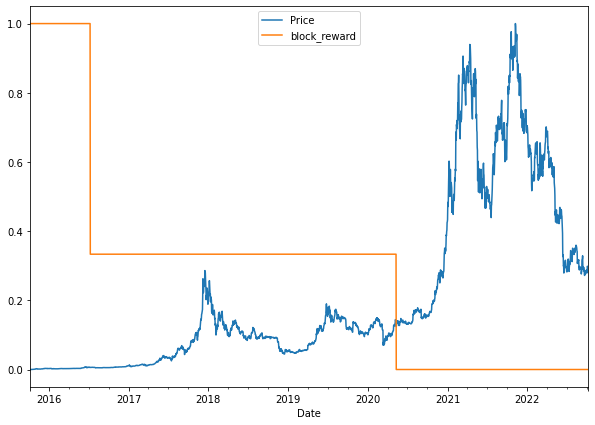

In [142]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [143]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [144]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2015-10-07,242.968994,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-08,242.304001,25,242.968994,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-09,243.931000,25,242.304001,242.968994,NaN,NaN,NaN,NaN,NaN
2015-10-10,244.940994,25,243.931000,242.304001,242.968994,NaN,NaN,NaN,NaN
2015-10-11,247.050003,25,244.940994,243.931000,242.304001,242.968994,NaN,NaN,NaN
2015-10-12,245.307999,25,247.050003,244.940994,243.931000,242.304001,242.968994,NaN,NaN
2015-10-13,249.507996,25,245.307999,247.050003,244.940994,243.931000,242.304001,242.968994,NaN
2015-10-14,251.988998,25,249.507996,245.307999,247.050003,244.940994,243.931000,242.304001,242.968994
2015-10-15,254.320007,25,251.988998,249.507996,245.307999,247.050003,244.940994,243.931000,242.304001


In [145]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2015-10-14,25.0,249.507996,245.307999,247.050003,244.940994,243.931000,242.304001,242.968994
2015-10-15,25.0,251.988998,249.507996,245.307999,247.050003,244.940994,243.931000,242.304001
2015-10-16,25.0,254.320007,251.988998,249.507996,245.307999,247.050003,244.940994,243.931000
2015-10-17,25.0,262.868988,254.320007,251.988998,249.507996,245.307999,247.050003,244.940994
2015-10-18,25.0,270.640015,262.868988,254.320007,251.988998,249.507996,245.307999,247.050003


In [146]:
# View labels
y.head()

Date
2015-10-14    251.988998
2015-10-15    254.320007
2015-10-16    262.868988
2015-10-17    270.640015
2015-10-18    261.643005
Name: Price, dtype: float32

In [147]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2040, 2040, 511, 511)

In [148]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [149]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 5ms/step - loss: 1044.6038


1044.603759765625

In [150]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([49471.863, 46852.957, 46021.75 , 44009.938, 42496.97 , 37526.098,
       39776.3  , 37597.574, 37167.215, 35024.74 ], dtype=float32)>

In [151]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 1044.6039,
 'mse': 2132713.0,
 'rmse': 1460.3811,
 'mape': 2.7547593,
 'mase': 1.0221276}

In [152]:
model_1_results

{'mae': 1050.2778,
 'mse': 2179035.8,
 'rmse': 1476.1558,
 'mape': 2.774667,
 'mase': 1.0276794}

In [153]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [154]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [155]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [156]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014983  0.8379835  -0.32870027  0.25159904 -0.47540277 -0.7783665
 -0.5299448 ]
Forecast: -0.7554212808609009


In [157]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [158]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2015-10-07,242.968994
2015-10-08,242.304001
2015-10-09,243.931000
2015-10-10,244.940994
2015-10-11,247.050003


In [159]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2015-10-14,251.988998,249.507996,245.307999,247.050003,244.940994,243.931000,242.304001,242.968994
2015-10-15,254.320007,251.988998,249.507996,245.307999,247.050003,244.940994,243.931000,242.304001
2015-10-16,262.868988,254.320007,251.988998,249.507996,245.307999,247.050003,244.940994,243.931000
2015-10-17,270.640015,262.868988,254.320007,251.988998,249.507996,245.307999,247.050003,244.940994
2015-10-18,261.643005,270.640015,262.868988,254.320007,251.988998,249.507996,245.307999,247.050003


In [160]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2040, 2040, 511, 511)

In [161]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [162]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [163]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [165]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 452ms/step - loss: 1113.4519 - mae: 1113.4519 - mse: 2368067.5000


[1113.451904296875, 1113.451904296875, 2368067.5]

In [167]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([49856.51 , 49167.51 , 45993.625, 42716.387, 43635.46 , 39646.54 ,
       39760.773, 39030.473, 41087.5  , 36044.133], dtype=float32)>

In [169]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [170]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 520: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 809: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 911: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 522: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 639: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 739: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 360: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 460: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [171]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [172]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 511), dtype=float32, numpy=
array([[49496.273, 48505.453, 45851.54 , ..., 20222.719, 20184.86 ,
        20117.35 ],
       [49561.574, 47456.344, 46097.21 , ..., 20471.28 , 20342.691,
        19949.781],
       [49263.332, 46779.582, 46384.125, ..., 20501.154, 20256.13 ,
        19926.975],
       ...,
       [47191.023, 44936.55 , 44240.652, ..., 19169.32 , 19366.506,
        18979.96 ],
       [48613.184, 47443.105, 45738.71 , ..., 20365.432, 20317.086,
        20038.826],
       [49437.53 , 47010.61 , 46201.125, ..., 20320.35 , 20221.463,
        19970.17 ]], dtype=float32)>

In [173]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 1022.6196,
 'mse': 2114384.0,
 'rmse': 1454.0922,
 'mape': 2.6918595,
 'mase': 1.0006164}

In [174]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

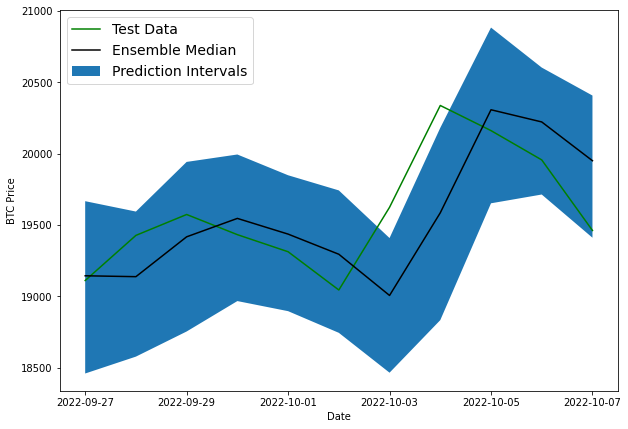

In [175]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [176]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2015-10-07,242.968994,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-08,242.304001,25,242.968994,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-09,243.931000,25,242.304001,242.968994,NaN,NaN,NaN,NaN,NaN
2015-10-10,244.940994,25,243.931000,242.304001,242.968994,NaN,NaN,NaN,NaN
2015-10-11,247.050003,25,244.940994,243.931000,242.304001,242.968994,NaN,NaN,NaN


In [178]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [179]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [180]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [219]:
# How many timesteps to predict into the future?
#INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days
INTO_FUTURE = 60 

In [220]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [221]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [19312.095703 19044.107422 19623.580078 20336.84375  20160.716797
 19955.443359 19461.140625] -> Prediction: 19255.162109375

Predicting on: 
 [19044.107422   19623.580078   20336.84375    20160.716797
 19955.443359   19461.140625   19255.16210938] -> Prediction: 19331.634765625

Predicting on: 
 [19623.580078   20336.84375    20160.716797   19955.443359
 19461.140625   19255.16210938 19331.63476562] -> Prediction: 19882.03515625

Predicting on: 
 [20336.84375    20160.716797   19955.443359   19461.140625
 19255.16210938 19331.63476562 19882.03515625] -> Prediction: 20199.591796875

Predicting on: 
 [20160.716797   19955.443359   19461.140625   19255.16210938
 19331.63476562 19882.03515625 20199.59179688] -> Prediction: 19951.541015625

Predicting on: 
 [19955.443359   19461.140625   19255.16210938 19331.63476562
 19882.03515625 20199.59179688 19951.54101562] -> Prediction: 19652.916015625

Predicting on: 
 [19461.140625   19255.16210938 19331.63476562 19882.03515625
 

In [222]:
future_forecast[:60]

[19255.162,
 19331.635,
 19882.035,
 20199.592,
 19951.541,
 19652.916,
 19330.004,
 19333.031,
 19564.684,
 19954.56,
 20007.709,
 19724.72,
 19457.682,
 19318.668,
 19451.562,
 19697.2,
 19901.275,
 19800.014,
 19537.865,
 19365.172,
 19369.262,
 19548.111,
 19728.902,
 19778.758,
 19612.88,
 19413.75,
 19345.367,
 19432.049,
 19593.29,
 19683.867,
 19633.826,
 19467.984,
 19348.906,
 19361.732,
 19474.473,
 19583.686,
 19594.244,
 19498.74,
 19370.52,
 19325.107,
 19383.56,
 19482.24,
 19531.516,
 19489.277,
 19390.227,
 19313.01,
 19320.652,
 19391.256,
 19455.447,
 19454.857,
 19389.65,
 19311.94,
 19281.625,
 19317.428,
 19376.713,
 19402.744,
 19370.668,
 19306.117,
 19258.865,
 19261.844]

In [223]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [224]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-10-07 00:00:00')

In [225]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
       '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
       '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
       '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
       '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
       '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
       '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
       '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
       '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16',
       '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20',
       '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
       '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
       '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
       '2022-12-03', '2022-12-04', '2022-12-05', '2022-12-06'],
      dtype='datetime64[D]')

In [226]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10',
        '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
        '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
        '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
        '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
        '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30',
        '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
        '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07',
        '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
        '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
        '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
        '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
        '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
        '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
        '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05',
        '2022-12-06'], dtype='datetime64

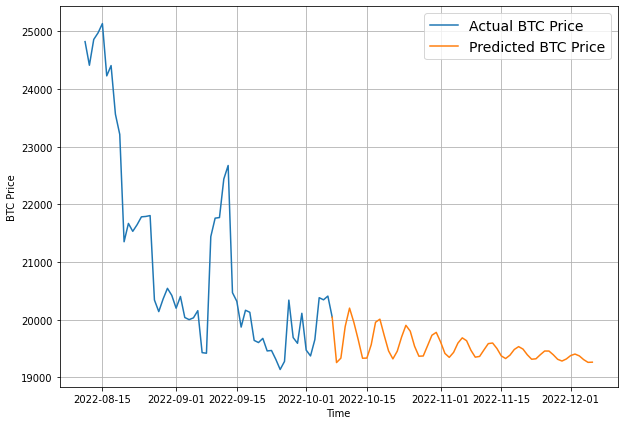

In [227]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [190]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [191]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[19688.34375,
 19589.265625,
 20109.849609,
 19471.154297,
 19370.308594,
 19653.542969,
 20380.34375,
 20343.748047,
 20408.392578,
 200.41085938]

In [192]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2022-09-28T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2022-10-02T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
       '2022-10-04T00:00:00.000000000', '2022-10-05T00:00:00.000000000',
       '2022-10-06T00:00:00.000000000', '2022-10-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

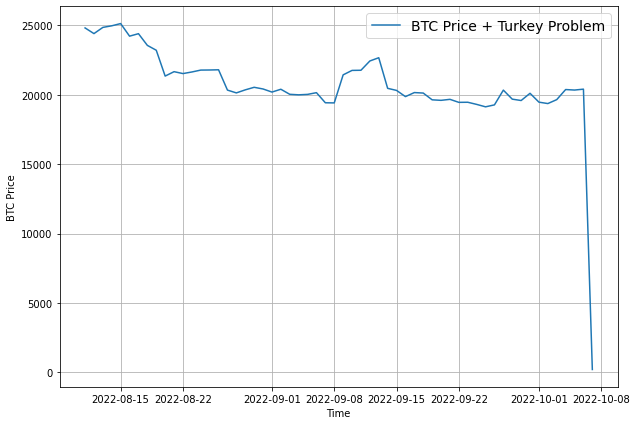

In [193]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [194]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2040, 511, 2040, 511)

In [195]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [196]:
turkey_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 901.5391


901.5390625

In [197]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 6ms/step - loss: 891.3602


891.3602294921875

In [198]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([51063.457, 50691.816, 49111.91 , 46623.176, 45417.277, 43376.76 ,
       42131.957, 42074.395, 38441.727, 38101.99 ], dtype=float32)>

In [199]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 14253.768,
 'mse': 316025300.0,
 'rmse': 17119.162,
 'mape': 79.83612,
 'mase': 15.913368}

In [200]:
model_1_results

{'mae': 1050.2778,
 'mse': 2179035.8,
 'rmse': 1476.1558,
 'mape': 2.774667,
 'mase': 1.0276794}

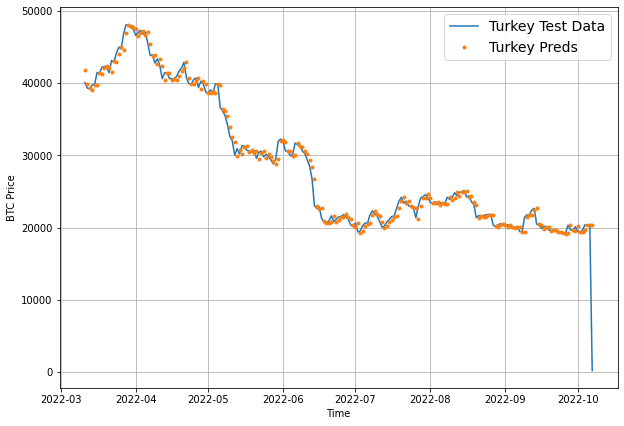

In [201]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

In [203]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              #"model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,1026.096191,2.108156e+06,1451.948853,2.699686,1.004018
model_1_dense_w7_h1,1050.277832,2.179036e+06,1476.155762,2.774667,1.027679
model_2_dense_w30_h1,1146.140381,2.438952e+06,1561.714600,3.050334,1.140097
model_3_dense_w30_h7,2115.932373,8.508954e+06,2424.905273,5.644074,2.077913
model_4_CONV1D,1061.740967,2.185573e+06,1478.368408,2.808481,1.038896
model_5_LSTM,1120.822021,2.350752e+06,1533.216309,2.977701,1.096706
model_6_multivariate,1044.603882,2.132713e+06,1460.381104,2.754759,1.022128
model_9_ensemble,1022.619629,2.114384e+06,1454.092163,2.691859,1.000616
model_10_turkey,14253.767578,3.160253e+08,17119.162109,79.836121,15.913368


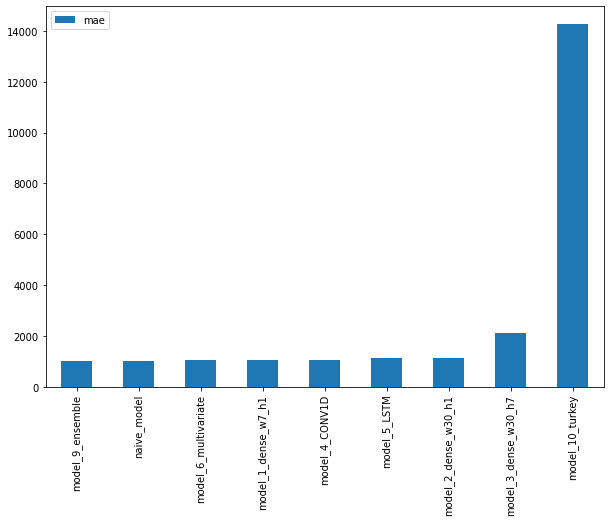

In [204]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");